In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
os.getcwd()

'/Users/user/Documents/GitHub/NORmet/tutorials'

In [3]:
os.chdir('../')

In [4]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [5]:
from normet.autodew import do_all

In [6]:
date_start = time.time()
df_dew=do_all(df, value='PM2.5',
                     feature_names=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH'],
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH'], 
                     n_samples=100,fraction=0.75)
date_post_training = time.time()
date_post_training-date_start

[flaml.automl.automl: 03-24 19:07:41] {2726} INFO - task = regression
[flaml.automl.automl: 03-24 19:07:41] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-24 19:07:41] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-24 19:07:41] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-24 19:07:41] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-24 19:07:41] {3472} INFO - Estimated sufficient time budget=264s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9144,	best estimator lgbm's best error=0.9144
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9144,	best estim

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:73: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  df[col].fillna(mode(df[col])[0][0], inplace=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 2, current learner lgbm
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.7303,	best estimator lgbm's best error=0.7303
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 3, current learner xgboost
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.2s,	estimator xgboost's best error=1.5563,	best estimator lgbm's best error=0.7303
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 4, current learner extra_tree
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.3s,	estimator extra_tree's best error=0.8458,	best estimator lgbm's best error=0.7303
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 03-24 19:07:41] {3519} INFO -  at 0.5s,	estimator lgbm's best error=0.5862,	best estimator lgbm's best error=0.5862
[flaml.automl.automl: 03-24 19:07:41] {3334} INFO - iteration 6, current learner xgboo

[flaml.automl.automl: 03-24 19:08:21] {3519} INFO -  at 40.4s,	estimator xgb_limitdepth's best error=0.4677,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:08:21] {3334} INFO - iteration 38, current learner extra_tree
[flaml.automl.automl: 03-24 19:08:21] {3519} INFO -  at 40.4s,	estimator extra_tree's best error=0.7742,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:08:21] {3334} INFO - iteration 39, current learner extra_tree
[flaml.automl.automl: 03-24 19:08:21] {3519} INFO -  at 40.4s,	estimator extra_tree's best error=0.7742,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:08:21] {3334} INFO - iteration 40, current learner extra_tree
[flaml.automl.automl: 03-24 19:08:21] {3519} INFO -  at 40.5s,	estimator extra_tree's best error=0.7697,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:08:21] {3334} INFO - iteration 41, current learner xgb_limitdepth
[flaml.automl.automl: 03-24 19:08:24] {3

77.60375118255615

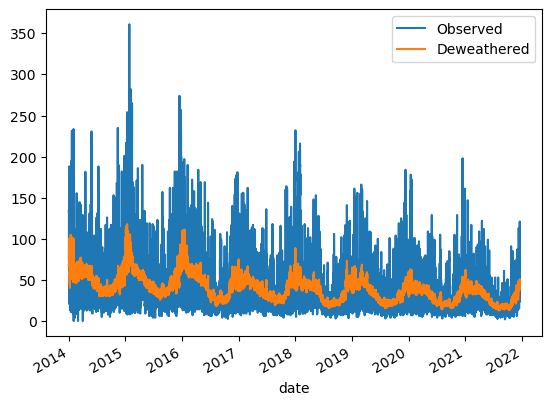

In [7]:
df_dew.plot()

In [8]:
from normet.autodew import prepare_data

In [9]:
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])
df=prepare_data(df, value='PM2.5', split_method = 'random',na_rm=False, replace=False, fraction=0.75)

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:73: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  df[col].fillna(mode(df[col])[0][0], inplace=True)
/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [10]:
from normet.autodew import train_model

In [11]:
automl=train_model(df,variables=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH'],
                time_budget= 60,  metric= 'r2', task= 'regression', seed= 7654321);

[flaml.automl.automl: 03-24 19:08:58] {2726} INFO - task = regression
[flaml.automl.automl: 03-24 19:08:58] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-24 19:08:58] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-24 19:08:58] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-24 19:08:58] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-24 19:08:58] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-24 19:08:59] {3472} INFO - Estimated sufficient time budget=314s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-24 19:08:59] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9144,	best estimator lgbm's best error=0.9144
[flaml.automl.automl: 03-24 19:08:59] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-24 19:08:59] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.9144,	best estim

[flaml.automl.automl: 03-24 19:09:33] {3334} INFO - iteration 33, current learner rf
[flaml.automl.automl: 03-24 19:09:33] {3519} INFO -  at 34.2s,	estimator rf's best error=0.7920,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:09:33] {3334} INFO - iteration 34, current learner xgb_limitdepth
[flaml.automl.automl: 03-24 19:09:34] {3519} INFO -  at 35.4s,	estimator xgb_limitdepth's best error=0.4677,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:09:34] {3334} INFO - iteration 35, current learner rf
[flaml.automl.automl: 03-24 19:09:34] {3519} INFO -  at 35.5s,	estimator rf's best error=0.7656,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:09:34] {3334} INFO - iteration 36, current learner xgboost
[flaml.automl.automl: 03-24 19:09:34] {3519} INFO -  at 36.0s,	estimator xgboost's best error=0.6350,	best estimator lgbm's best error=0.4617
[flaml.automl.automl: 03-24 19:09:34] {3334} INFO - iteration 37, current lear

In [12]:
from normet.autodew import normalise

In [13]:
date_start = time.time()
df_dew = normalise(automl, df, 
                           feature_names = ['date_unix','day_julian', 'weekday', 'hour', 
                                            'ws','wd', 'air_temp','atmos_pres', 'dew_point', 'RH'],
                          variables= ['ws','wd', 'air_temp', 'atmos_pres', 'dew_point', 'RH'],
                          n_samples=100)
date_post_training = time.time()
date_post_training-date_start

7.381528854370117

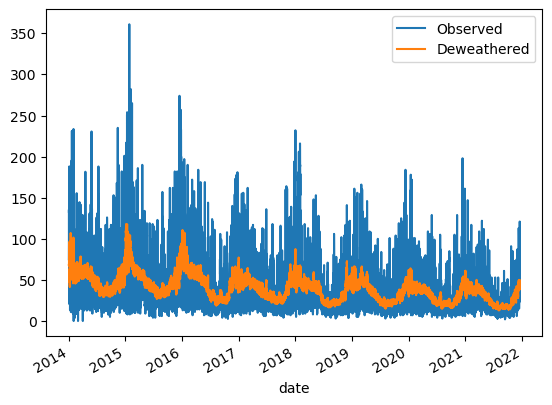

In [14]:
df_dew.plot()

In [15]:
from normet.autodew import modStats

In [16]:
modStats(df,set='testing')

/Users/user/Documents/GitHub/NORmet/normet/autodew.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value_predict']=automl.predict(df)


,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_Value,COE,IOA
0,5670,0.872134,-0.251574,13.295834,-0.006474,0.342144,20.127505,0.749885,0.0,0.394146,0.697073


In [17]:
from normet.pdp import partial_dependencies

In [18]:
pdp=partial_dependencies(automl, df,['date_unix','day_julian', 'weekday', 'hour', 
                                            'ws','wd', 'air_temp','atmos_pres', 'dew_point', 'RH'],
                     variable=['date_unix','day_julian', 'weekday', 'hour', 
                                            'ws','wd', 'air_temp','atmos_pres', 'dew_point', 'RH'])

In [19]:
pdp

,variable,value,partial_dependency
0,date_unix,1.388563e+09,41.555066
1,date_unix,1.417746e+09,51.835195
2,date_unix,1.446227e+09,51.058740
3,date_unix,1.474546e+09,37.552461
4,date_unix,1.501849e+09,39.376625
...,...,...,...
88,RH,7.906970e+01,39.858906
89,RH,8.435101e+01,38.955559
90,RH,8.938492e+01,36.728003
91,RH,9.407337e+01,36.637274


In [20]:

from joblib import Parallel, delayed
from pdpbox import pdp, get_dataset

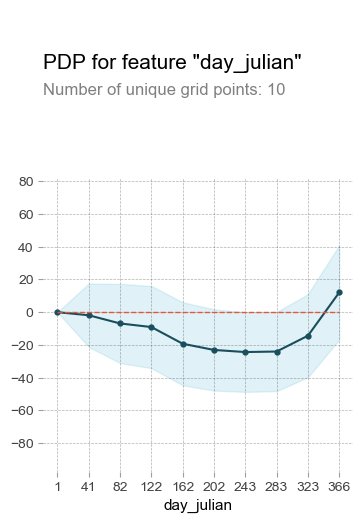

In [21]:
feature_names=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH']
plot_params = {
    'title_fontsize': 15,
    'subtitle_fontsize': 12,
    'contour_color':  'white',
    'font_family': 'Arial',
    'cmap': 'viridis',
    'inter_fill_alpha': 0.8,
    'inter_fontsize': 9}
pdp_A=pdp.pdp_isolate(model=automl,
                           dataset=df,
                           model_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH'],
                           feature='day_julian')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_A,feature_name='day_julian', center=True, 
                         x_quantile=True, ncols=1,plot_lines=False, frac_to_plot=100,plot_params=plot_params,
                         figsize=(4, 6))